# **Tarefa: Clustering**

### Nesta tarefa, você deve carregar um dataset e agrupar os objetos utilizando algoritmos de pelo menos duas categorias diferentes (partição, hierárquico, densidade)

**Dicas:**
- Explore diferentes parâmetros, como o número de clusters ou a distância usada, para observar como isso afeta os resultados.
- Analise os insights que surgem a partir das visualizações dos agrupamentos encontrados.

# **Sobre o Dataset**

Este dataset contém informações de **clientes de um distribuidor atacadista**, registrando o **gasto anual** (em unidades monetárias) em diferentes categorias de produtos. O objetivo, no contexto de **clustering**, é agrupar clientes com padrões de consumo semelhantes. A análise pode apoiar estratégias de marketing B2B, segmentação de clientes, definição de mix de produtos e políticas de fidelização.

O arquivo possui **440 clientes (linhas)** e **8 colunas**, sendo 6 de gastos numéricos e 2 categóricas (canal e região).

### **Features (colunas):**

Colunas:  
> **Channel:** Canal de atendimento do cliente  
> • `1` → Horeca (Hotel/Restaurant/Café)  
> • `2` → Retail (Varejo)  

> **Region:** Região do cliente  
> • `1` → Lisbon  
> • `2` → Oporto  
> • `3` → Other  

> **Fresh:** Gasto anual em produtos frescos.  
> **Milk:** Gasto anual em produtos lácteos.  
> **Grocery:** Gasto anual em produtos de mercearia.  
> **Frozen:** Gasto anual em produtos congelados.  
> **Detergents_Paper:** Gasto anual em detergentes e papel.  
> **Delicassen:** Gasto anual em produtos de delicatessen.  

# **Carregue as bibliotecas**

Dica: Para esta tarefa, além das bibliotecas `pandas` e `matplotlib`, explore funções das bibliotecas `sklearn` e `sklearn_extra`. Considere os seguintes pacotes:
- **cluster:** KMeans, KMedoids, AgglomerativeClustering, DBSCAN
- **preprocessing:** MinMaxScaler (normalização) e OneHotEncoder (binarização)
- **metrics:** silhouette_score

Sinta-se à vontade para adicionar outros pacotes que achar úteis.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,  AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import silhouette_score

### **Carregue os Dados**

In [ ]:
df=pd.read_csv('/content/Wholesale customers data.csv')
display(df.head())
df.info()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## **Pré-Processamento dos Dados**

Aplique as técnicas de pré-processamento que vimos em aula no dataset fornecido.

### **Dicas:**
- **Converter dados categóricos para numéricos:** Use `LabelEncoder` ou `OneHotEncoder`.

- **Transformar os dados:** Experimente `MinMaxScaler` para ajustar a escala dos dados.

- **Remover outliers:** Verifique outliers com base no IQR e os elimine se necessário.

- **Tratar valores nulos:** Preencha com a média, moda, mediana ou remova as linhas, dependendo do impacto no dataset.


In [ ]:
categoricos = ['Channel', 'Region']
numericos = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for col in categoricos:
  df[col].fillna(df[col].mode()[0], inplace=True)
display(df.head(20))
for col in numericos:
  df[col].fillna(df[col].mean(), inplace=True)
display(df.head(20))
for col in numericos:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df_sem_outliers = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
display(df_sem_outliers.head(20))



/tmp/ipython-input-804477103.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-804477103.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


/tmp/ipython-input-804477103.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098
10,2,3,3366,5403,12974,4400,5977,1744
11,2,3,13146,1124,4523,1420,549,497


In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_categorico = encoder.fit_transform(df_sem_outliers[categoricos])
encoded_categorico_df = pd.DataFrame(encoded_categorico, columns=encoder.get_feature_names_out(categoricos))


scaler = MinMaxScaler()
numerico_escala = scaler.fit_transform(df_sem_outliers[numericos])
numerico_escala_df = pd.DataFrame(numerico_escala, columns=numericos)

df_processed = pd.concat([encoded_categorico_df, numerico_escala_df], axis=1)

display(df_processed.head())


,Channel_1,Channel_2,Region_1,Region_2,Region_3,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.0,1.0,0.0,0.0,1.0,0.166146,0.130727,0.081464,0.005402,0.065427,0.367364
1,0.0,1.0,0.0,0.0,1.0,0.092531,0.132824,0.103097,0.049651,0.080590,0.487892
2,1.0,0.0,0.0,0.0,1.0,0.173964,0.015536,0.045464,0.182340,0.012346,0.491194
3,0.0,1.0,0.0,0.0,1.0,0.123436,0.111706,0.055218,0.018323,0.043896,0.398459
4,0.0,1.0,0.0,0.0,1.0,0.159024,0.042809,0.075148,0.013006,0.076842,0.149147


# **Clustering**

**Escolha pelo menos 2 algoritmos de clustering que pertençam a métodos diferentes (partiçãos, densidade ou hierárquico).**

### **Passos:**

1. Para cada algoritmo, execute-o em 6 diferentes cenários, variando os parâmetros.

2. Calcule o índice de silhueta (`silhouette_score`) para cada cenário e compare os resultados.

3. Para os métodos baseados em partiçãos (ex.: KMeans), realize também a **análise do método do cotovelo (Elbow Method)** e escolha o número de clusters com base nessa análise.

In [ ]:
kmeans_resultados = {}
for n_clusters in range(2, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(df_processed)
    silhouette_media = silhouette_score(df_processed, kmeans_labels)
    kmeans_resultados[n_clusters] = silhouette_media


agg_clustering_results = {}
for n_clusters in range(2, 8):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    agg_clustering_labels = agg_clustering.fit_predict(df_processed)
    silhouette_avg = silhouette_score(df_processed, agg_clustering_labels)
    agg_clustering_results[n_clusters] = silhouette_avg

for i in kmeans_resultados:
  print("K-means", i, kmeans_resultados[i])
print("\n")
for i in agg_clustering_results:
  print("Avg-cluster", i, agg_clustering_results[i])


K-means 2 0.5049857339038053
K-means 3 0.5844800257090238
K-means 4 0.651649004379965
K-means 5 0.7037886510282013
K-means 6 0.7335972412359194
K-means 7 0.5846049441229733


Avg-cluster 2 0.5049857339038053
Avg-cluster 3 0.5844800257090238
Avg-cluster 4 0.6363666563130456
Avg-cluster 5 0.7037886510282013
Avg-cluster 6 0.7335972412359194
Avg-cluster 7 0.5848704541459235


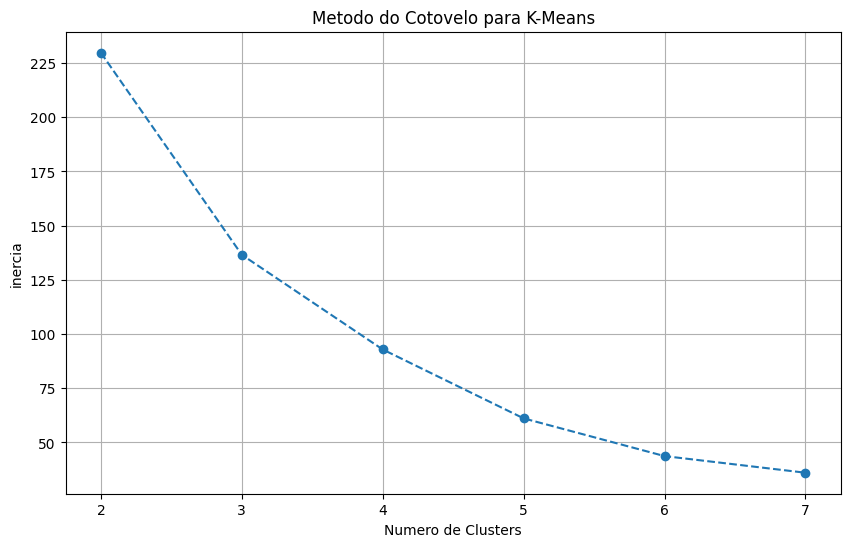

In [ ]:
inercia = []
for n_clusters in range(2, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(df_processed)
    inercia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 8), inercia, marker='o', linestyle='--')
plt.xlabel('Numero de Clusters')
plt.ylabel('inercia')
plt.title('Metodo do Cotovelo para K-Means')
plt.xticks(range(2, 8))
plt.grid(True)
plt.show()

### **Resultados**

1. **Resumo dos Resultados:**
   - Para cada algoritmo utilizado, apresente os resultados dos 6 cenários testados e compare as métricas calculadas.

2. **Visualização Gráfica:**
   - Plote um gráfico comparando o índice de silhueta entre os cenários.

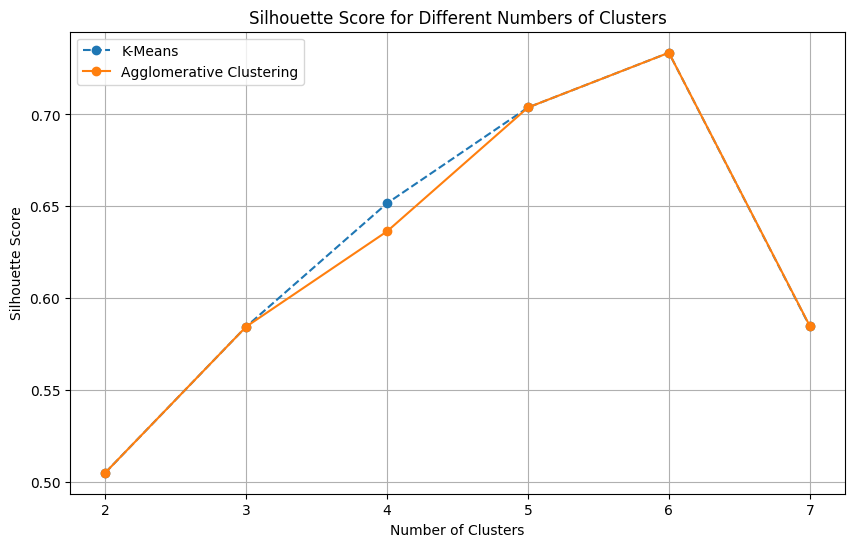

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(list(kmeans_resultados.keys()), list(kmeans_resultados.values()), marker='o', linestyle='--', label='K-Means')
plt.plot(list(agg_clustering_results.keys()), list(agg_clustering_results.values()), marker='o', linestyle='-', label='Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xticks(range(2, 8))
plt.legend()
plt.grid(True)
plt.show()

## **Para cada algoritmo, visualize graficamente o modelo que teve o melhor desempenho**

Com base nos modelos de melhor desempenho, escolha variáveis e crie gráficos de dispersão que permitam visualizar os clusters gerados.

**Dica:**

Ao criar scatter plots, teste combinações de 2 variáveis do dataset para facilitar a visualização dos clusters. Para o clustering hierárquico, experimente também plotar um dendrograma.

### **Dendrograma:**
Use o código abaixo para o dendrograma:
```python
import scipy.cluster.hierarchy as sch

Z = sch.linkage(df[[variavel_1, variavel_2]], method='centroid')

# p = altura máxima que será exibida
sch.dendrogram(Z, p = ?, truncate_mode = "level") # Mude o valor de p para melhorar a vizualização do seu dendrograma

```



[
Documentação Dendrograma](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram)

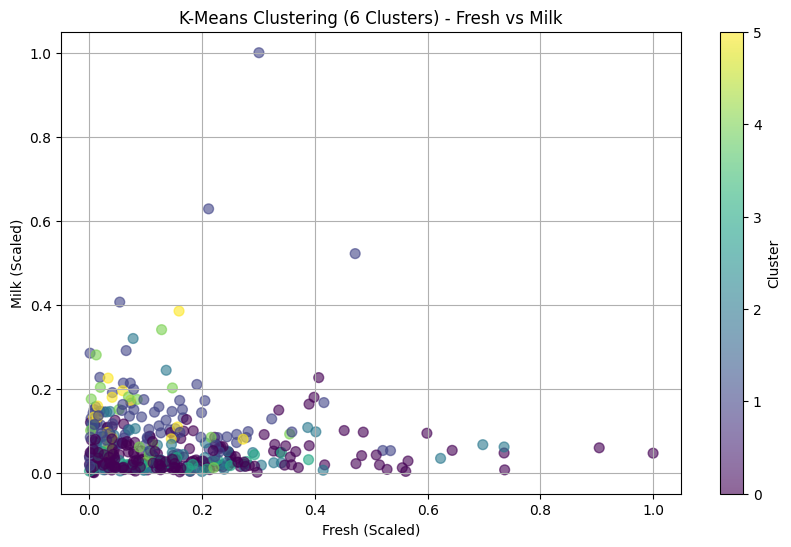

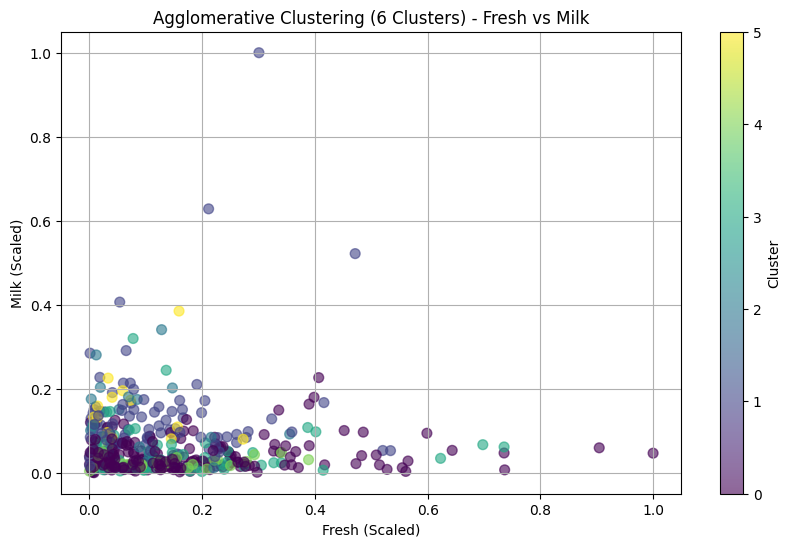

In [ ]:

kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_processed)

plt.figure(figsize=(10, 6))
plt.scatter(df_processed['Fresh'], df_processed['Milk'], c=kmeans_labels, cmap='viridis', marker='o', s=50, alpha=0.6)
plt.xlabel('Fresh (Scaled)')
plt.ylabel('Milk (Scaled)')
plt.title('K-Means Clustering (6 Clusters) - Fresh vs Milk')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

agg_clustering = AgglomerativeClustering(n_clusters=6)
agg_clustering_labels = agg_clustering.fit_predict(df_processed)

plt.figure(figsize=(10, 6))
plt.scatter(df_processed['Fresh'], df_processed['Milk'], c=agg_clustering_labels, cmap='viridis', marker='o', s=50, alpha=0.6)
plt.xlabel('Fresh (Scaled)')
plt.ylabel('Milk (Scaled)')
plt.title('Agglomerative Clustering (6 Clusters) - Fresh vs Milk')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
df_processed

,Channel_1,Channel_2,Region_1,Region_2,Region_3,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0.0,1.0,0.0,0.0,1.0,0.166146,0.130727,0.081464,0.005402,0.065427,0.367364,1
1,0.0,1.0,0.0,0.0,1.0,0.092531,0.132824,0.103097,0.049651,0.080590,0.487892,1
2,1.0,0.0,0.0,0.0,1.0,0.173964,0.015536,0.045464,0.182340,0.012346,0.491194,0
3,0.0,1.0,0.0,0.0,1.0,0.123436,0.111706,0.055218,0.018323,0.043896,0.398459,1
4,0.0,1.0,0.0,0.0,1.0,0.159024,0.042809,0.075148,0.013006,0.076842,0.149147,1
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1.0,0.0,0.0,0.0,1.0,0.389590,0.163338,0.172715,0.374743,0.004385,0.605669,0
409,1.0,0.0,0.0,0.0,1.0,0.514534,0.018736,0.008202,0.128201,0.002205,0.644744,0
410,0.0,1.0,0.0,0.0,1.0,0.190571,0.210136,0.325943,0.011777,0.363463,0.512933,1
411,1.0,0.0,0.0,0.0,1.0,0.134940,0.026224,0.024025,0.028956,0.004042,0.583930,0


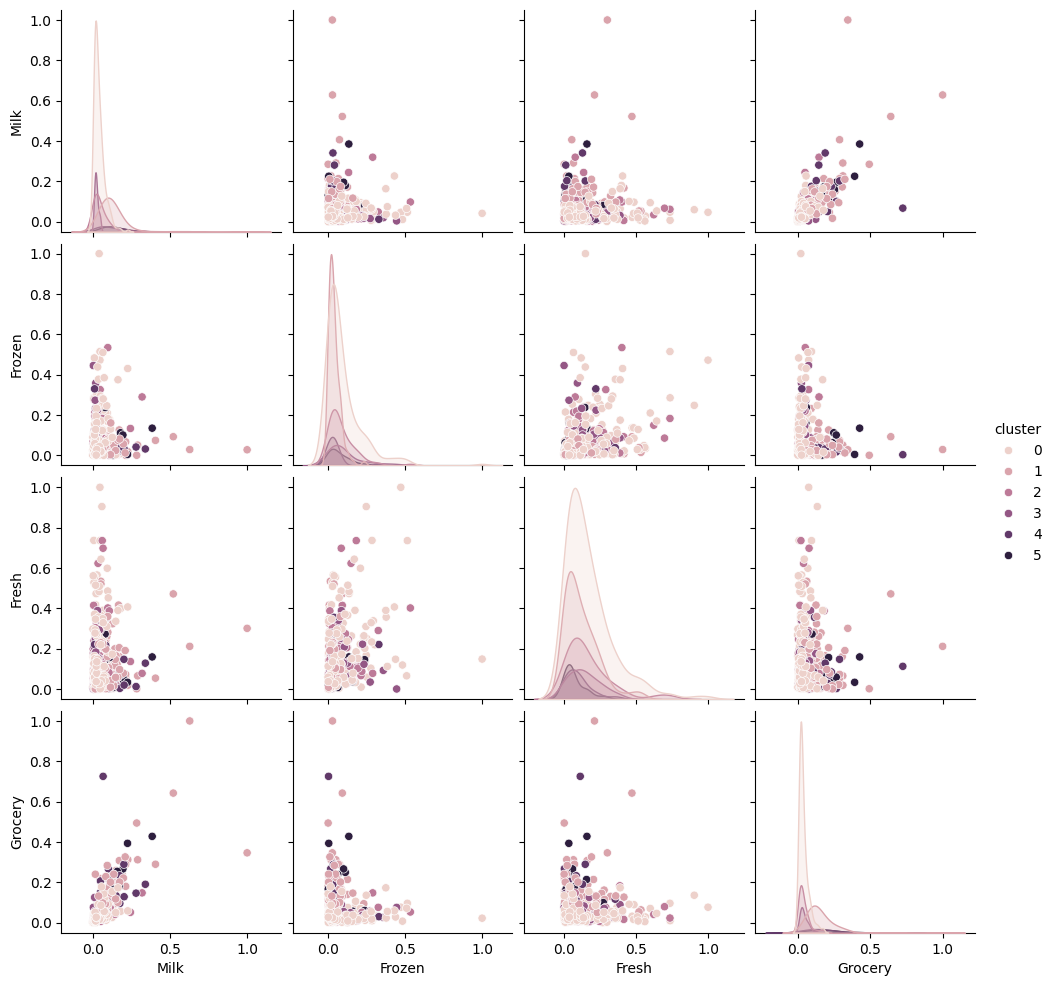

In [ ]:
import seaborn as sns
df_toplot = df_processed[['Milk','Frozen','Fresh','Grocery','cluster']]
sns.pairplot(data=df_toplot, hue='cluster')
plt.show()

In [ ]:
df_processed.groupby('cluster').mean()

,Channel_1,Channel_2,Region_1,Region_2,Region_3,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,1.0,0.172239,0.039678,0.038452,0.096104,0.018078,0.266277
1,0.0,1.0,0.0,0.0,1.0,0.119968,0.133130,0.162753,0.038369,0.162346,0.358228
2,1.0,0.0,1.0,0.0,0.0,0.166424,0.050160,0.042348,0.087723,0.023492,0.301767
3,1.0,0.0,0.0,1.0,0.0,0.142552,0.023324,0.043660,0.105145,0.011035,0.257598
4,0.0,1.0,0.0,1.0,0.0,0.095585,0.124393,0.175941,0.043322,0.205939,0.340121
5,0.0,1.0,1.0,0.0,0.0,0.071654,0.138368,0.191087,0.068036,0.190782,0.381020


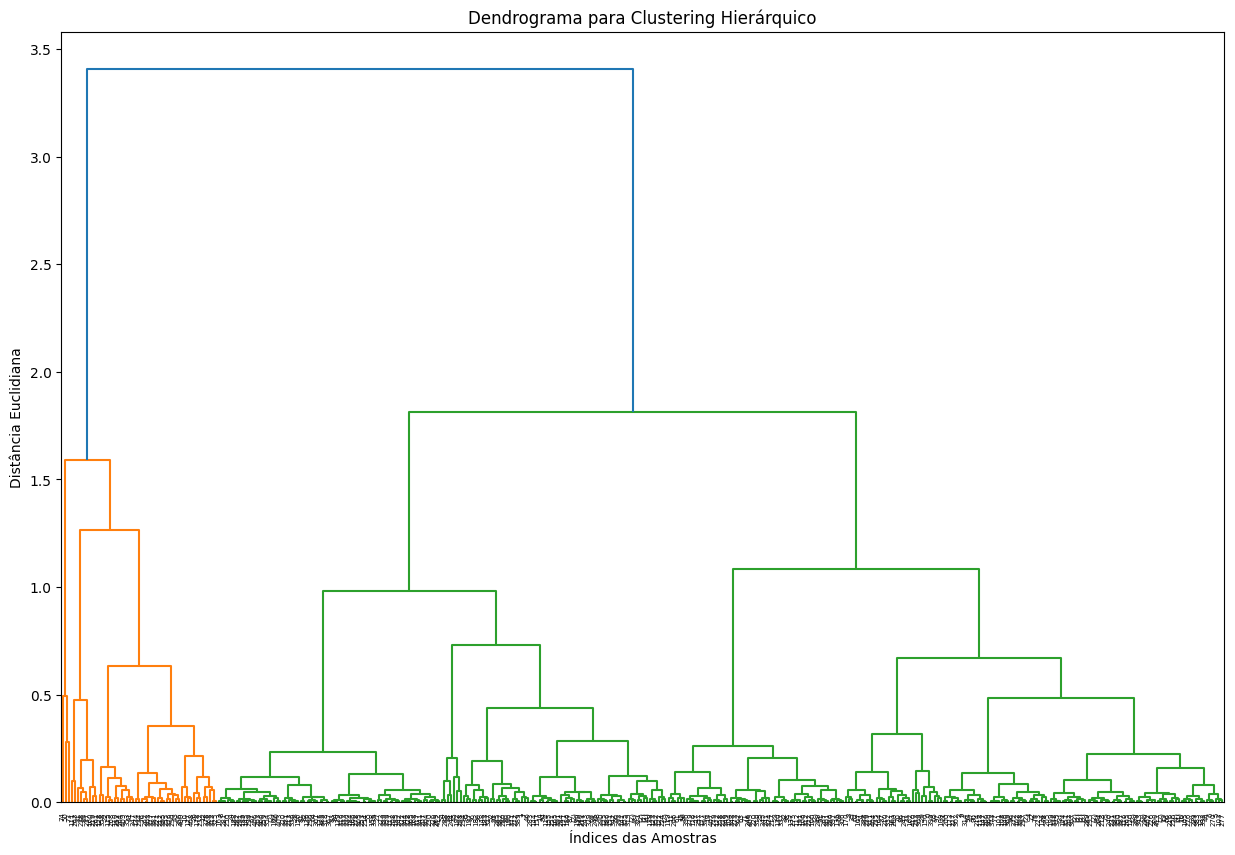

In [ ]:
import scipy.cluster.hierarchy as sch

# Select two variables for the dendrogram (you can change these)
variavel_1 = 'Fresh'
variavel_2 = 'Milk'

# Create the linkage matrix
Z = sch.linkage(df_processed[[variavel_1, variavel_2]], method='ward') # Changed method to 'ward' which is common for this type of data

# Plot the dendrogram
plt.figure(figsize=(15, 10))
sch.dendrogram(Z, p=10, truncate_mode="level", show_leaf_counts=True) # You can adjust 'p' for better visualization
plt.title('Dendrograma para Clustering Hierárquico')
plt.xlabel('Índices das Amostras')
plt.ylabel('Distância Euclidiana')
plt.show()

### **Análise dos Clusters**

Após identificar o melhor modelo, selecione **3 itens de cada cluster** e explique o que cada agrupamento parece representar com base nas características dos itens.

1. **Análise dos Itens:**
   - Analise as características principais desses itens (ex.: Frozen, Milk, Region, ...).
   - Identifique padrões ou características que diferenciam cada cluster.

2. **Interpretação dos Agrupamentos:**
   - Explique o que cada cluster parece estar representando.
   - Relacione as características predominantes de cada cluster a possíveis perfis de clientes.


In [ ]:
#Cluster 0: Clientes com gastos relativamente baixos na maioria das categorias, particularmente em Fresh, Frozen e Delicassen. Maiores gastos em Milk e Grocery em comparação com alguns outros clusters,
#mas não os mais altos no geral. Pode representar pequenas empresas ou indivíduos com necessidades limitadas.

#Cluster 1: Clientes com gastos muito altos em Detergents_Paper e Grocery, e também altos em Milk. Menores gastos em Fresh, Frozen e Delicassen. Provavelmente representa negócios de varejo ou instituições
#que exigem grandes quantidades de produtos de limpeza e mercearia em geral.

#Cluster 2: Clientes com altos gastos em Fresh, Frozen e Delicassen. Menores gastos em Milk, Grocery e Detergents_Paper. Este cluster pode representar restaurantes, cafés ou empresas focadas em produtos
#alimentícios frescos e especializados.

#Cluster 3: Clientes com gastos moderados em todas as categorias. Nenhuma categoria se destaca como significativamente maior do que as outras. Isso pode representar um grupo diversificado de
#clientes com necessidades variadas.

#Cluster 4: Clientes com os maiores gastos em Fresh. Gastos moderados em outras categorias. Provavelmente representa empresas fortemente focadas em produtos frescos ou ingredientes.

#Cluster 5: Clientes com gastos muito altos em Milk, Grocery e Delicassen, e também altos em Fresh e Frozen. Menores gastos em Detergents_Paper. Este cluster pode representar restaurantes maiores,
#hotéis ou empresas de catering com alta demanda em muitas categorias de alimentos.